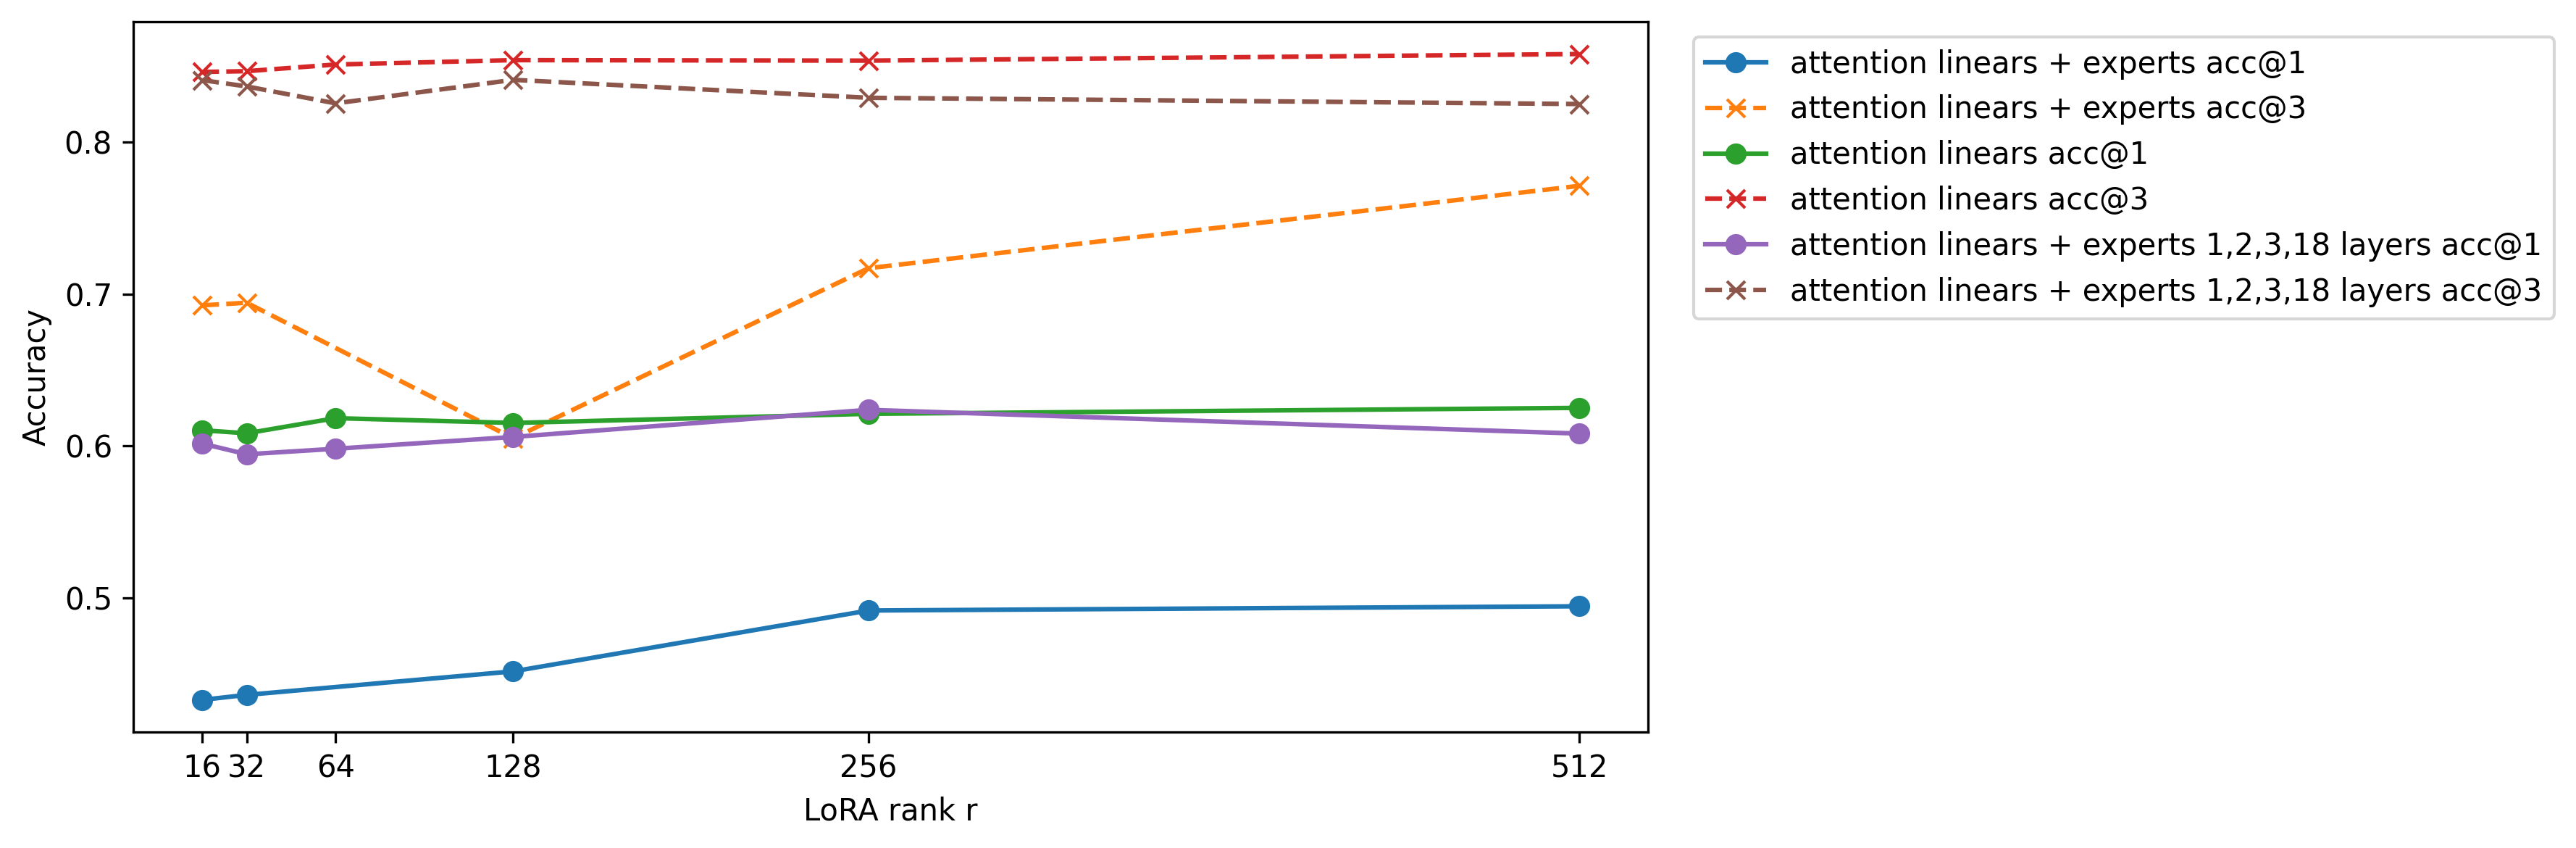

In [180]:
import matplotlib.pyplot as plt

data = [
    ("r512", "experts-merged", 0.4944662805130327, 0.7711522548613984),
    ("r128", "experts-merged", 0.4516388871677303, 0.6049941136377719),
    ("r128", "merged", 0.6151082108045597, 0.8538741120105733),
    ("r32", "selected-experts-merged", 0.5944926922262233, 0.8365600508366872),
    ("r16", "merged", 0.6103171980835949, 0.8461093672559061),
    ("r128", "selected-experts-merged", 0.6058979018668429, 0.8409053361969271),
    ("r64", "selected-experts-merged", 0.598135874067937, 0.8254349627174814),
    ("r256", "selected-experts-merged", 0.6237604510985806, 0.829088080886642),
    ("r256", "experts-merged", 0.4916788779568767, 0.7169771823320076),
    ("r512", "selected-experts-merged", 0.608107538662509, 0.8249968395769247),
    ("r16", "experts-merged", 0.43287707291392474, 0.6925068000350969),
    ("r16", "selected-experts-merged", 0.6015023818248443, 0.8407230975937462),
    ("r32", "merged", 0.6082934082273252, 0.8466049892615232),
    ("r32", "experts-merged", 0.4361610599673062, 0.6942269637787146),
    ("r64", "merged", 0.6182629166150415, 0.850989138066328),
    ("r512", "merged", 0.6250361376120266, 0.8578862594474043),
    ("r256", "merged", 0.6211126254491389, 0.8535497460042126),
]

replace = {
    "experts-merged": "attention linears + experts",
    "merged": "attention linears",
    'selected-experts-merged': "attention linears + experts 1,2,3,18 layers"
}

def r_to_int(r):
    return int(r.replace("r", ""))

categories = {}
for r, cat, acc1, acc3 in data:
    cat = replace[cat]
    categories.setdefault(cat, [])
    categories[cat].append((r_to_int(r), acc1, acc3))

plt.figure(figsize=(12, 4), dpi=300)

for cat, vals in categories.items():
    vals = sorted(vals, key=lambda x: x[0])
    r_vals = [v[0] for v in vals]
    acc1_vals = [v[1] for v in vals]
    acc3_vals = [v[2] for v in vals]

    plt.plot(r_vals, acc1_vals, marker="o", label=f"{cat} acc@1")
    plt.plot(r_vals, acc3_vals, marker="x", linestyle="--", label=f"{cat} acc@3")

plt.xlabel("LoRA rank r")
plt.ylabel("Accuracy")
plt.legend(loc="upper left", bbox_to_anchor=(1.02, 1.0))
r_ticks = [16, 32, 64, 128, 256, 512]
plt.xticks(r_ticks)
plt.tight_layout()
plt.show()